## Shift our focus to dealing with time series data
* We may not sue them often when working directly with algo models
* one of the reasons we can show hy some of these techniques are not a good idea on finanical data
* Higher level understanding of concepts
* understand why not use these Arena models will be useful in other fields

### Following Topics

1. Time series basics
2. Statsmodels Python LIbrary
3. ETS Models And Decomposition
4. EWMA Models (expo weighted moving average)
5. ARIMA Models (often not good for financial data



## TIme Series Basics

1. Concepts
2. Particular properties

Trends, Upward, Horizontal/Stationary, Downward
on average what is the value doing as a function of time

Seasonality 
Repeating trends
Google Trends for Snowboarding

Cyclical - Trends with no set repetition
Upward trend that is no repetitive
Trend with no seasonality, sometimes it goes up and down but cannot determine the season itself.
A trend without seasonality

Secular - non cyclical

## Statsmodels
Heavily inspired by R programming langage
allows users to 
1. explore data
2. estimate statistical models
3. perform statistical tests
4. Extensive list of stats
5. stat test
6. plotting functions


* https://www.statsmodels.org/ *

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm

In [3]:
# SM comes with data sets
df = sm.datasets.macrodata.load_pandas().data

In [4]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [5]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [8]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3'))

In [9]:
df.index = index

In [10]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


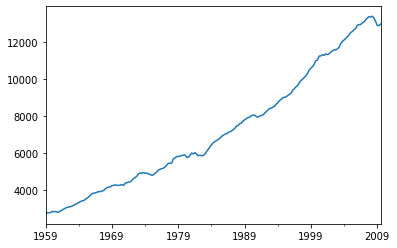

In [11]:
df['realgdp'].plot()

In [13]:
results = sm.tsa.filters.hpfilter(df['realgdp'])
type(results)

tuple

In [17]:
# Cycle and trend
results[:10]

(1959-03-31     39.511915
 1959-06-30     80.088532
 1959-09-30     48.875455
 1959-12-31     30.591933
 1960-03-31     64.882667
                  ...    
 2008-09-30    102.018455
 2008-12-31   -107.269472
 2009-03-31   -349.047706
 2009-06-30   -397.557073
 2009-09-30   -333.115243
 Name: realgdp_cycle, Length: 203, dtype: float64,
 1959-03-31     2670.837085
 1959-06-30     2698.712468
 1959-09-30     2726.612545
 1959-12-31     2754.612067
 1960-03-31     2782.816333
                   ...     
 2008-09-30    13222.581545
 2008-12-31    13249.189472
 2009-03-31    13274.457706
 2009-06-30    13299.061073
 2009-09-30    13323.456243
 Name: realgdp_trend, Length: 203, dtype: float64)

In [18]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])

In [19]:
df['trend'] = gdp_trend

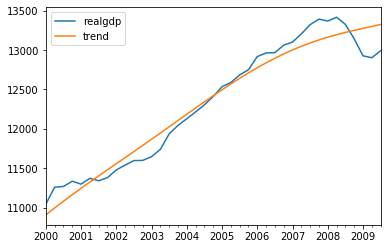

In [22]:
df[['realgdp','trend']]["2000-03-01":].plot()

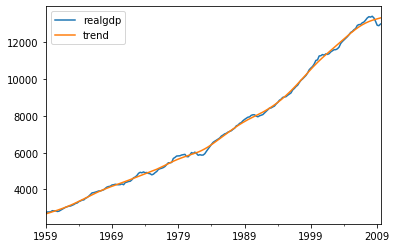

In [23]:
df[['realgdp','trend']].plot()

## ETS Models

Error
Trend
Seasonality

Exponential Smoothing
Trend Methods MOdels
ETS Decomposition

Take each terms for smoothing purposes, add mulitply or omit
Create a model to fit our data

Airline passangers - famous data set

### EWMA

Exponential Weighted Moving Average
SMA 
- has weaknesses in smaller window will lead to noise or signal
- will always lag
- will never reach full peak or value
- doesn't inform about future
- describe trends in data
- extreme historical values can skew 

EWMA will allow us to reduce the lag effect of an SMA and overweight to recent values, the closer to present time the more weight



In [25]:
airline = pd.read_csv("data/airline_passengers.csv",index_col="Month")
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [26]:
airline.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-04', '1960-05', '1960-06', '1960-07', '1960-08', '1960-09',
       '1960-10', '1960-11', '1960-12',
       'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'],
      dtype='object', name='Month', length=145)

In [28]:
airline.dropna(inplace=True)

In [30]:
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [31]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [33]:
# 6 month window based on index - remeber to do .mean() at end!
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

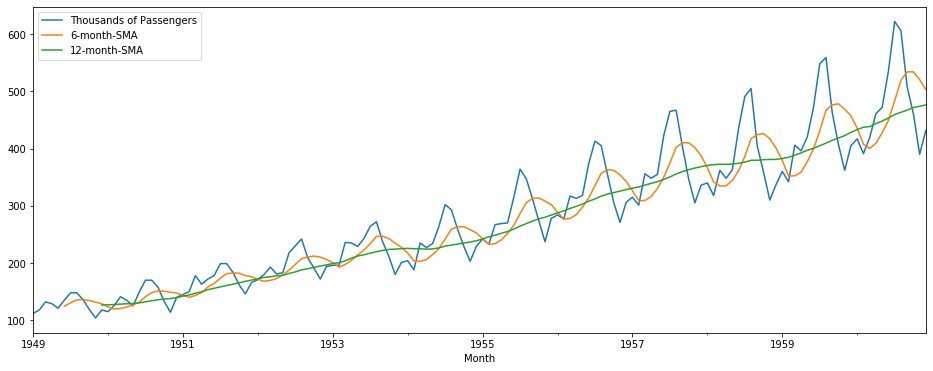

In [36]:
airline.plot(figsize=(16,6))

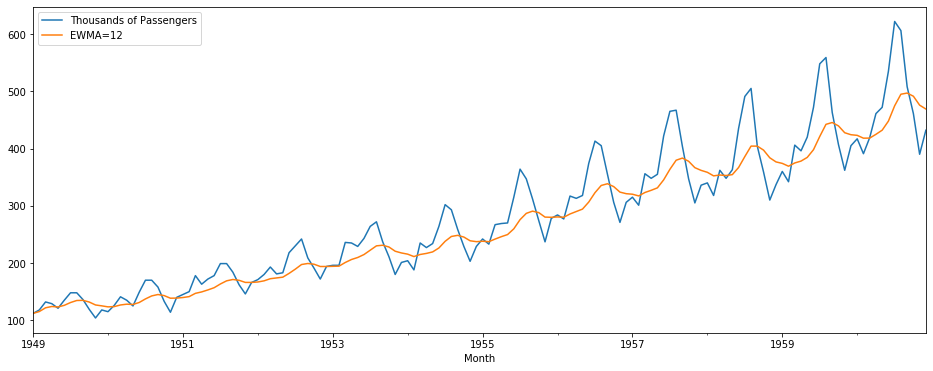

In [37]:
airline['EWMA=12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline[['Thousands of Passengers','EWMA=12']].plot(figsize=(16,6))

### ETS Decomposition

Theoritcally
seperate its 

1. error
2. trend
3. seasonality component


In [39]:
airline = pd.read_csv("data/airline_passengers.csv",index_col="Month")
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


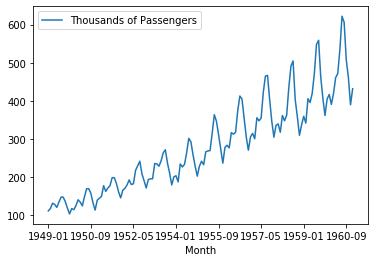

In [40]:
airline.plot()

In [42]:
airline.dropna(inplace=True)

In [43]:
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [46]:
# model - additive, multiplicative
result = seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

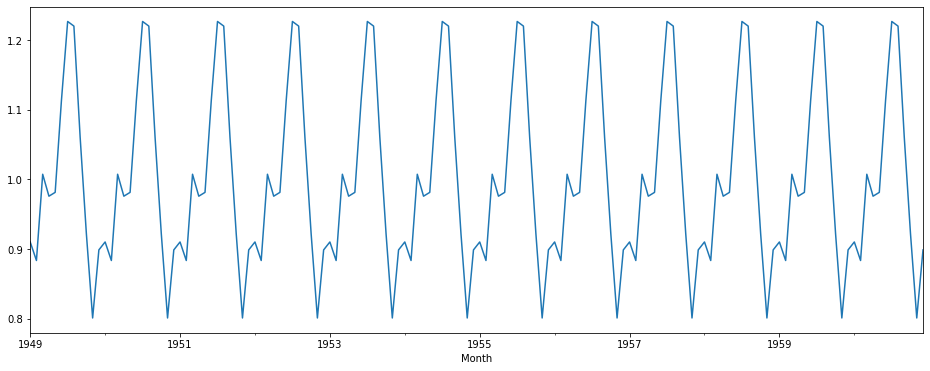

In [50]:
result.seasonal.plot(figsize=(16,6));

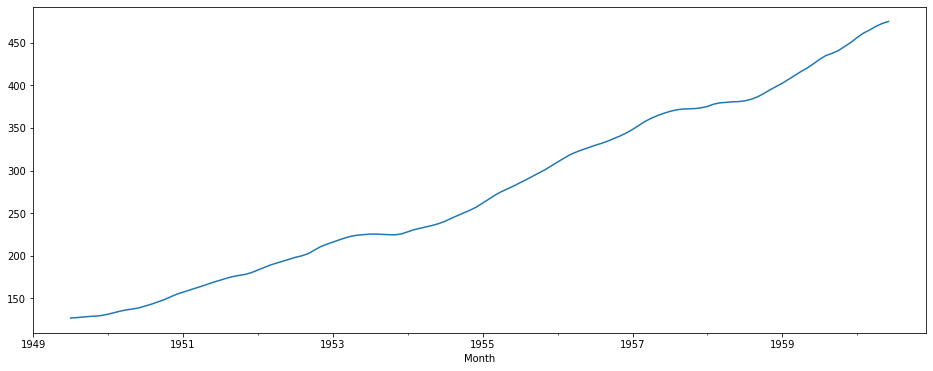

In [51]:
result.trend.plot(figsize=(16,6));

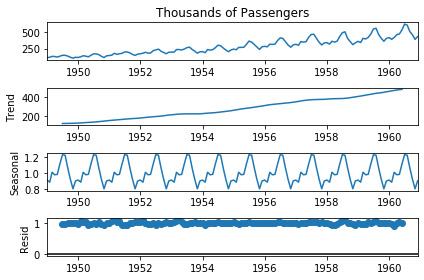

In [54]:
fig = result.plot()

### ARIMA Theory
Auto-regressive Integrated Moving Averages.

ARIMA models often don't work well with historical equities data.

However they are so fundamental to understanding time series analysis that it is still worth the time to go over them

ARIMA models can be complex
Make sure to make full of use of materials

IS a generalization of an auto-regressive moving average

1. Non-seasonal ARIMA
2. Seasonal ARIMA

* python examples will be using seasonal ARIMA

ARIMA models are applied in some cases where data show evidance of non-stationarity, where an initial differencing step corresponding to the integrated part of the model
can be applied one or more times to elimiante non-stationarity

differencing is actually simple

### ARIMA components

#### ARIMA(p,d,q) are non negative integers
1. AR(p) Auto regression - A regression model that utilizes the dependent relationship between a current observation and aobservations over a previous period.

2. I(d) Integrated - differencing of observations. Substracting an observation from an observation at the previous time step) in order to make the time series stationary.

3. MA(q) Moving Average - a model taht uses the dependency between an observation and a residual error from a moving average model applied to lagged observations

Stationary vs. Non-Stationary

A stationary series as a constant mean and variance over time. Allows us to predict that mean and variance in the future. The mean must be constant.

Variance should not be function of time

Covariance should not be a function of time

A common tests Augmented Dickey-Fuller test

If the set is not stationary you will then need to transform it to be stationary.

This is done through differencing - which has a cost in sacrifcing of losing a row of data.

You can also difference by a time unit

Discuss the p,d,q terms and how you choose them

a big part of this are Autocorrelation plots and paritali autocorrelation plots


## Autocorrelation Plots & Partial Autocorrelation Plots

An autocorrelation show the correlation of the time series with itself lagged by x time units

y axis is the correlation
x axies is the time units of lag

Imagine taking your time series of length T, copy it
delete the the first observation of copy # 1
delete the last observation of copy # 2

Now you ahve two time series of length T-1 for which  you calculate a correlation coefficient.

It represents the correlation of the series lagged by one time unit

You go on and do this for all possible time lags x and this defines the plot

1. Gradual Decline
2. Sharp Drop-off

The actual interpretation and how it relates to ARIMA models can get complicated.

Whether we will use the AR or MA components for the ARIMA model or both

In general you would auto regressive OR moving average

You will set values for p and q. 

IF the auto correlation plot shows positive autocorrlation at the first lag (lag-1) then it suggests AC. If it negative use MA.

1. p: The number of lag observations included in our model
2. d: the number of times that the raw observations are differenced
3. q: The size of moving average window, also called the order of moving average.

There are also partial correlation is a conditional correlation. 

It is the correlation between two variables under the assumption that we know and take into accoutn the values of some other set of variables.

Consider a regression context in which 

y = response variable

x1,x2,x3 are predictor variables trying to predic the response of y.

The partial correlation between y and x3 is the correlation between the variable determined taking account.

Partial auto-correlation

Typically a shpart drop after lag "k" suggests that AR-k model should be used.

If there is gradual declline it suggests an MA model.


IDentification of an AR model is often best done with the PACF.

Identification of an MA model is often best done with the ACF rather than the PACF.

View the notebook and resource links for more details.

Finally once you've analyzed your data using ACF and PACF 

ARIMA will take three terms p,d,a nd q

for PDQ for seasonal ARima

OK let's see this in action!

## Arima Code Along

The general process for ARIMA models is the following:

* visualize the time series Data
* make the time series data stationary (constant mean, variance, and co-variance)
* Plot the Correlation and the AUtoCorrelation Charts
* Construct the ARIMA Model
* Use the model to make predictions

Let's go through these steps!

In [67]:
df = pd.read_csv("data/monthly-milk-production-pounds-p.csv")
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [68]:
df.columns = ['Month','Milk in Pounds per Cow']
df.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [69]:
df.tail()

,Month,Milk in Pounds per Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [70]:
df.drop(168,axis=0,inplace=True)

In [71]:
df.tail()

,Month,Milk in Pounds per Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [72]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,Milk in Pounds per Cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [73]:
df.set_index('Month',inplace=True)
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [74]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [75]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


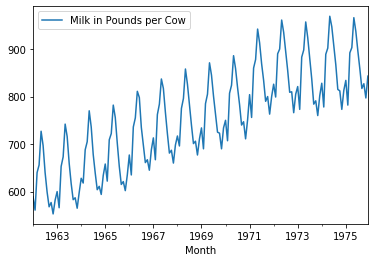

In [76]:
# Step 2 - Visualize Data
df.plot();

In [77]:
time_series = df['Milk in Pounds per Cow']
type(time_series)

pandas.core.series.Series

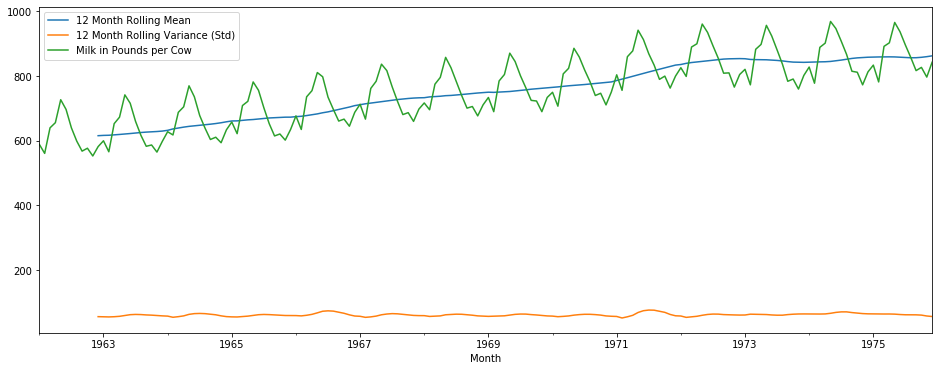

In [82]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')

time_series.rolling(12).std().plot(label='12 Month Rolling Variance (Std)')
time_series.plot(figsize=(16,6))
plt.legend();

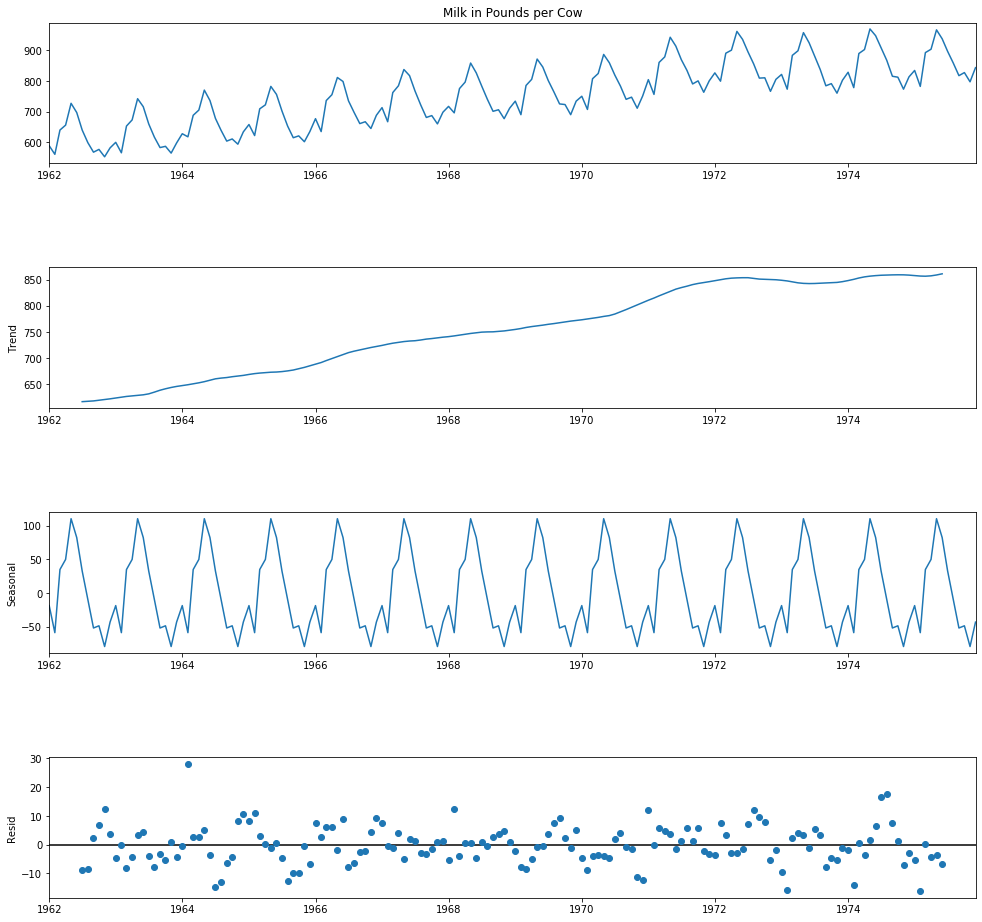

In [87]:
#showing an obvious upward trend in the data and mean so there exists seasonanilty
### ETS Decomposition plot, mathematically seperates out the seasonality
decomposition = seasonal_decompose(time_series)
fig = decomposition.plot()
fig.set_size_inches(15,15)

In [89]:
# ARIMA Code test for stationarity 10:29 -
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [91]:
from statsmodels.tsa.stattools import adfuller

In [92]:
result = adfuller(df['Milk in Pounds per Cow'])

In [93]:
def adf_check(time_series):    
    result = adfuller(time_series)
    print(" Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistic',"p-value","# of lags","Num of Observations used"]
    
    for value, label in zip(result,labels):
        print(label+": "+ str(value))
    
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis")
        print("failed to reject null hypothesis")
        print("Data has a unit root and is not stationary")
    
        

In [94]:
adf_check(time_series)

 Augmented Dicky-Fuller Test
ADF Test Statistic: -1.3038115874221219
p-value: 0.6274267086030352
# of lags: 13
Num of Observations used: 154
weak evidence against null hypothesis
failed to reject null hypothesis
Data has a unit root and is not stationary


In [95]:
df['First Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(1)

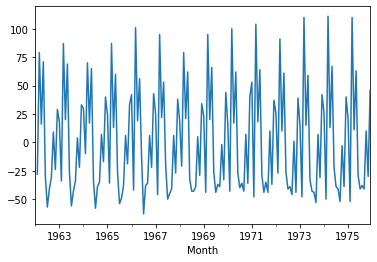

In [96]:
df['First Difference'].plot()

In [97]:
adf_check(df['First Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic: -3.054995558653048
p-value: 0.030068004001787472
# of lags: 14
Num of Observations used: 152
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [98]:
df['Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)

In [99]:
adf_check(df['Second Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic: -14.32787364560337
p-value: 1.112698933208171e-26
# of lags: 11
Num of Observations used: 154
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


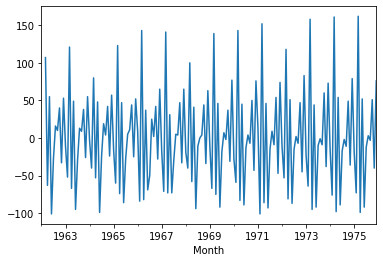

In [100]:
df['Second Difference'].plot();

In [101]:
df['Seasonal Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(12)

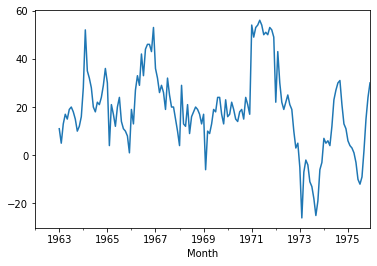

In [102]:
df['Seasonal Difference'].plot()

In [103]:
adf_check(df['Seasonal Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic: -2.335419314359397
p-value: 0.16079880527711382
# of lags: 12
Num of Observations used: 143
weak evidence against null hypothesis
failed to reject null hypothesis
Data has a unit root and is not stationary


In [105]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)

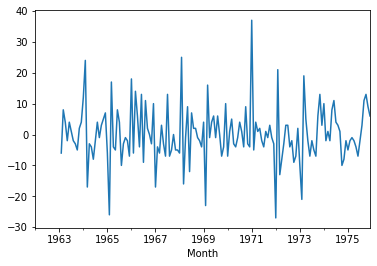

In [106]:
df['Seasonal First Difference'].plot();

In [107]:
adf_check(df['Seasonal First Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic: -5.038002274921986
p-value: 1.8654234318788024e-05
# of lags: 11
Num of Observations used: 143
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [108]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

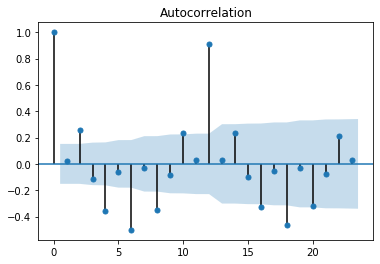

In [109]:
fig_first = plot_acf(df['First Difference'].dropna())

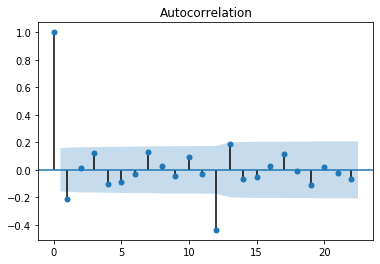

In [110]:
fig_seasona_first = plot_acf(df['Seasonal First Difference'].dropna())

In [111]:
from pandas.plotting import autocorrelation_plot

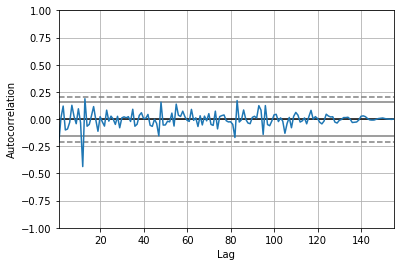

In [112]:
autocorrelation_plot(df['Seasonal First Difference'].dropna())

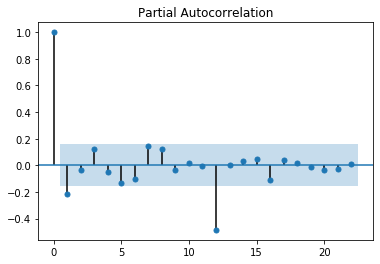

In [114]:
fig_pacf = plot_pacf(df['Seasonal First Difference'].dropna())

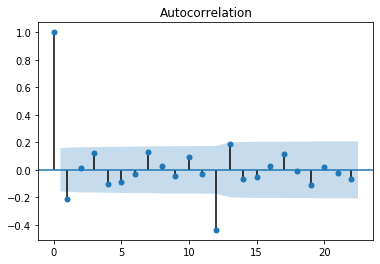

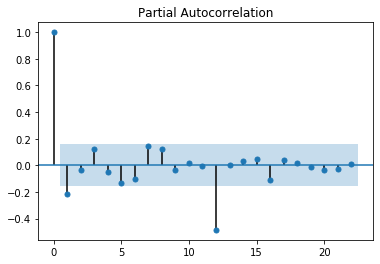

In [116]:
a =plot_acf(df['Seasonal First Difference'].dropna())
b = plot_pacf(df['Seasonal First Difference'].dropna())

In [119]:
from statsmodels.tsa.arima_model import ARIMA

In [120]:
#Autoregressive Integrated Moving Average
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array_like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array_like, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes
 |  -----
 |

In [121]:
model = sm.tsa.statespace.SARIMAX(df['Milk in Pounds per Cow'],order=(0,1,0),seasonal_order=(1,1,1,12))

C:\Users\Goliath\miniconda3\envs\quantitive_finance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Goliath\miniconda3\envs\quantitive_finance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [123]:
results = model.fit()

In [124]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:               Milk in Pounds per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Thu, 23 Apr 2020   AIC                           1074.131
Time:                                      19:55:27   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

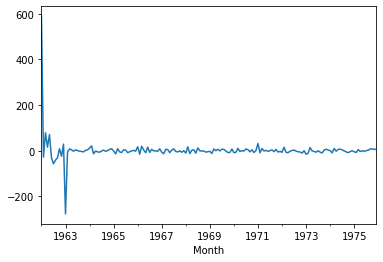

In [126]:
results.resid.plot()

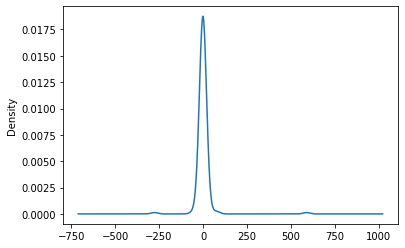

In [128]:
# display the error density
results.resid.plot(kind='kde')

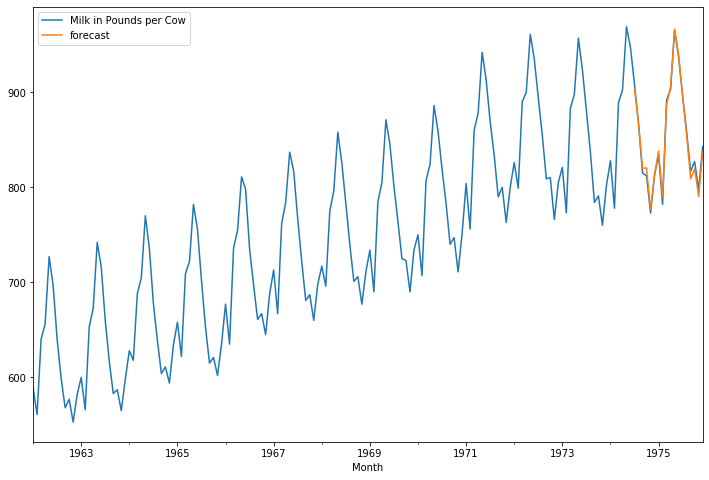

In [130]:
df['forecast'] = results.predict(start=150, end=168)
df[['Milk in Pounds per Cow','forecast']].plot(figsize=(12,8))

In [131]:
df.tail()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,855.358648
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,808.841372
1975-10-01,827.0,10.0,51.0,15.0,13.0,819.323185
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,790.427530
1975-12-01,843.0,46.0,76.0,30.0,6.0,837.063622


In [132]:
from pandas.tseries.offsets import DateOffset

In [133]:
help(DateOffset)

Help on class DateOffset in module pandas.tseries.offsets:

class DateOffset(pandas._libs.tslibs.offsets.BaseOffset)
 |  DateOffset(n=1, normalize=False, **kwds)
 |  
 |  Standard kind of date increment used for a date range.
 |  
 |  Works exactly like relativedelta in terms of the keyword args you
 |  pass in, use of the keyword n is discouraged-- you would be better
 |  off specifying n in the keywords you use, but regardless it is
 |  there for you. n is needed for DateOffset subclasses.
 |  
 |  DateOffset work as follows.  Each offset specify a set of dates
 |  that conform to the DateOffset.  For example, Bday defines this
 |  set to be the set of dates that are weekdays (M-F).  To test if a
 |  date is in the set of a DateOffset dateOffset we can use the
 |  is_on_offset method: dateOffset.is_on_offset(date).
 |  
 |  If a date is not on a valid date, the rollback and rollforward
 |  methods can be used to roll the date to the nearest valid date
 |  before/after the date.
 |  


In [134]:
# last index value + a date offset where months is equal to x (1,2,3,4)
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1,24)]

In [135]:
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [137]:
future_df = pd.DataFrame(index=future_dates,columns=df.columns)
future_df.head()


,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
final_df = pd.concat([df,future_df])
final_df.head()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN


In [139]:
final_df.tail()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
final_df['forecast'] = results.predict(start=168,end=192)

In [141]:
final_df.tail()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,951.525867
1977-08-01,NaN,NaN,NaN,NaN,NaN,911.918957
1977-09-01,NaN,NaN,NaN,NaN,NaN,865.881182
1977-10-01,NaN,NaN,NaN,NaN,NaN,871.027295
1977-11-01,NaN,NaN,NaN,NaN,NaN,836.962996


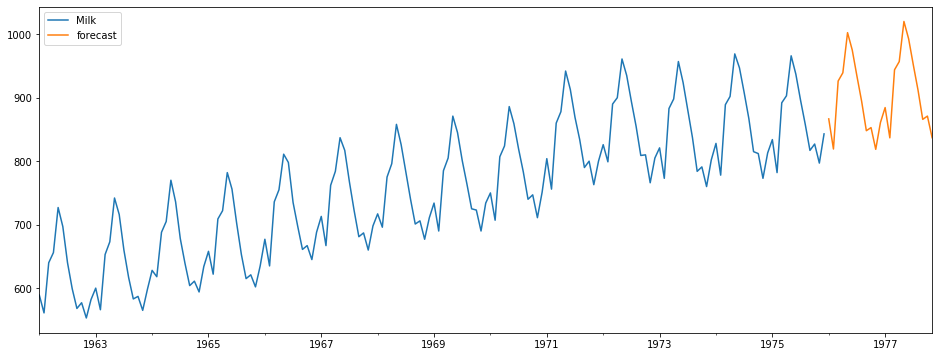

In [144]:
final_df['Milk in Pounds per Cow'].plot(label='Milk',figsize=(16,6))
final_df['forecast'].plot(label='forecast');
plt.legend();